<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithm-Performance-Benchmarking/blob/main/MaternalHealthRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.columns


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
df.shape

(1014, 7)

In [ ]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df[['RiskLevel']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df.head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,0
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,0
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518,0
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,0
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,1
5,0.216667,0.777778,0.607843,0.077692,0.0,0.759036,0
6,0.216667,0.666667,0.411765,0.077692,0.0,0.855422,2
7,0.416667,0.166667,0.215686,0.384615,0.8,0.951807,0
8,0.366667,0.555556,0.803922,0.069231,0.0,0.759036,2
9,0.533333,0.666667,0.607843,0.923077,0.0,0.759036,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['RiskLevel'], axis = 1), df['RiskLevel'], test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6600985221674877

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[31,  2, 12],
       [ 3, 73, 11],
       [ 8, 33, 30]])

In [ ]:
import seaborn as sns

<Axes: >

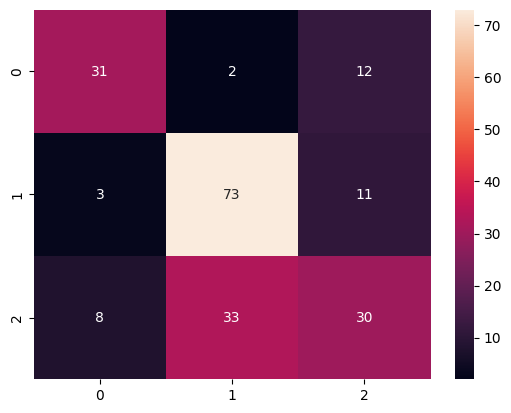

In [ ]:
sns.heatmap(cm,annot=True)